## Midterm for ATOC7500

This exam is for graduate students. If you are taking ATOC4500/are an undergraduate student, you need to use the other exam (wityh 4500 in the name)

Total points: Total points: 41 and 1 possible bonus point

## Name: 

### 1. Equilibrium Blackbody one-layer atmosphere Energy Balance Model (4 points + 1 bonus)
A.	What are the assumptions we make when we use a one-layer blackbody atmosphere Energy Balance Model (EBM) that is in equilibrium? (3 points)

B. Is a grey or a black atmosphere EBM a more realistic approximation for earth and why? (1 points)

C. **Bonus question:** What would be further improvements we could make to the zero dimensional EBM that we haven't made so far and what would those improvements allow us to study we can't study now?  (1 point)*


#### Answer:
1A. 
* We assume all energy comes from the sun. 
* We assume the atmosphere is transparamet for shortwave radiation
* We assume the atmosphere is a black-body, and hence emits absopbs and re-emits all longwave energy.
* We assume we can approximate the atmosphere with one layer

1B. 

* The grey atmosphere model is more realitstic, as the real atmosphere has windows through which radiation can emitt without being absorped, so a grey atmosphere model is a closer approimation to reality than a blackbody, if we consider the total radiation emitted. It also allows us to choose an emissivity that gives us the observed surface tempertaure, which the black bidy atmosphere model does not (it's too warm). 

1C.
* **Bonus question:** We could add the internal heat source of earth, which would allow us to assess how large that effect is on the surface tempertaure. We could add time-dependent albedo, to study the effect of ice ages.



### 2. Discretization of ODEs (4 points)
A.	(2 points) Using **Euler backward**, write down the discretized version of the following equation in a markdown box: $\frac{dy}{dt}=y+5y$. 
**Your result should be in a form that you could code up to solve on the computer, so it should be in the form $y_{n+1}= ... $**. If you show your steps, I can give points even if the final answer is wrong, depending how much was correct before. Your choice.



B.	(2 points) List one advantage and one disadvantage of the Euler forward method compared to the Euler backward method.




####  Answer:
2A. 
Euler backward: $\frac{y_{n+1}-y_n}{\Delta t} = y_{n+1} + 5 y_{n+1}$, which gives $y_{n+1}=y_n+\Delta t * 6 y_{n+1}$, which gives $y_{n+1} - \Delta t * 6 y_{n+1} = y_n $, which can be re-arranged to $y_{n+1}(1-6\Delta t)=y_n$, to give $y_{n+1}=\frac{y_n}{(1-6\Delta t)}$

2B. One disadvatnage of the Euler forward method is that it can be unstable if we have a too large timestep. Euler backward can have as large a timestep as we want and wont get unstable. An advantage is that Euler forward is easier than Euler backward, and can be applied equally well to linear and non-linear ODEs.



### 3. Time-dependent grey atmosphere 1D Energy Balance Model: Effect of nuclear war (16 points)

Research tells us that a nuclear war would lead to widespread fires, which could emit enough smoke, black carbon and other aerosols into the upper atmosphere that it would reduce the amount of solar radiation that reseaches the ground for up to a decade. At the same time, the large burned areas would reduce the albedo of about 1.5% of the land surface, as it would change from green to black. Both the change in Solar radiation and of albedo would be largest initially, and decrease over time until the atmosphere and land returns back to normal. A typical timescale for the atmospheric recovery to prior incoming radiation levels is 10 years, whereas burned land can take 20 years to return completely back to pre-fire states. 

While the sun intensity doesn't actually change under this scnario, not all the shortwave radiation reaches the surface under this scenario. So in a very simplified way, we can treat this as a reduction in the solar radiation in our 1D EBM for the surface. We will assume that the greenhouse effect does not change (so epsilon stays the same throughout the simulation).

A simplified version of the effect of this scenario on both the solar radiation and the albedo is coded up below for you to use.   

**Questions**

A.	What effect do you expect the decrease in the incoming solar radiation at the surface for 10 years to have on the globally-averaged surface temperature of earth over time and why? (1 point)

B. What effect do you expect the decrease in albedo (due to burned areas) for 20 years to have on the globally-averaged surface temperature of earth over time and why? (1 point)

C.	Now, let’s compare your expectations to what you find using an **adaptation of our time-dependent single layer grey-atmosphere 1D latitudinally varuing EBM without heat fluxes** that gives a global mean surface temperature of 288K for the present day solar constant (using constants shown below). 
**First only test what the change in solar radiation over time does. Then check what the change in the albedo over time does by itself. Then check what effect solar and albedo changing together over time has on the global mean surrface temperture.** (10 points)

* **Heat Capacity**: As we are dealing with a timescale of forcing changes over 10-20 years, the heat capacity we need to use is for the top 100 m of earth only. As before, we will assume that 30% of earth is covered by land and 70% are covered by oceans. An expression for the heat capacity to use is provided below with the constants. 

* **Solar radiation**: Use the pre-coded time-dependent solar insolation function below, which represents the change of the solar radiation received at the surface over time. It needs to be multiplied by the s_y function we used before (also provided below, but feel free to use your own), so we have the latitudinally varying solar radiation. Adapt your existing model to use this time-dependent solar insolation instead of the previously used constant latitudinally varying solar radiation. 

* **Albedo**: Use the pre-coded time-dependent and latitudinally varying albedo function below, which represents the change of the albedo in response to wide-spread fires over land over time. Adapt your existing model to use this time-dependent latitudinally-varying albedo instead of the latitudinally varrying but constant in time albedo we used before. (***Note that the latitudinally varying albedo function is slightly different than before, so make sure to use the one supplied below***)

* **Time step and integration length**: Integrate to t_end=90 \* years (90 years years in seconds) and use a time-step of half a year, dt=0.5 \* years (0.5 year timestep, in seconds), using years  = 365.25 \* 24 \* 3600 (seconds per year). 

* **Starting tempertaure**: As starting tempertaure (at t=0), use 288 K at all latitudes. 

* **Constants**: All the constants to be used are included below. ***Note that y is now defined with 10,000 increments, as otherwise the global mean tempertature is not 288K, as 100 increments as used before is a too bad approximation to the latitudinally varying solar radiation.*** 

* **Global Tempertaure**: All questions are asking for the globally-averaged surface tempertaure. So you need to take the mean of the global tempertaures in the latitudinally dependent model. An example of how to do this is provided below (below the constants). In this case, based on how we definded y, all latitude bands have the same area, so no area weighting is needed. So a simple **np.mean** of the latitudinally varying tempertaures will provide the global mean tempertaure. Make sure that for no change, you get around 288K global mean surface temperature before you make any changes. 

D.	Plot the resulting globally-averaged surface temperature over time. **This means three lines in the same plot**, one for the solar forcing changing only, one for the albedo changing only, and one for the solar and albedo forcing changing at the same time. Making sure all axis are labeled and the x-axis is labeled in **years**.  (2 points)

E.	Describe what you find for the globally-averaged surface temperature evolution over time, in particular contrasting the effect of the solar radiation change over time versus the albedo change over time versus the case of solar radiation and albedo changing at the same time. (1 point)

F. Compare what you wrote in E to your expectations from A and B, explaining any mismatches.  (1 point)





#### Answer:

3A. I would expect that the decreased solar radiation leads to a temperature drop globally, because less incoming shortwave radition directly affects the surface tempertaure. 

3B. The decreased albedo on the other hand would increase global tempertatures, as it would increase the amount of the solar radiation that is absorpted, which would increase global surface tempertaures. 

Which one wins depends on their magnitude, but I expect the solar radiation change will be dominant, so we will see a cooling.


In [1]:
# 3c. Adaptation of the single-layer grey 1D atmosphere model, with a equilibrium surface temperature of ~288K.

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

# Physical constants
Re    = 6.371E6      # Radius of Earth in m
eps   = 0.8         # Emissivity fraction
sigma = 5.67E-8      # Stephan Boltzmann constant in W / m^2 / K^4
c_s   = 712          # specific heat of Silicon rock in J /kg / K
rho_s = 2650         # density of Silicon rock in kg/m^3
alpha = 0.3         # Albedo of Earth
years = 365.25*24*3600 # seconds in a year
S0    = 1361         # Solar constant in W/,2 
c_w   = 4000         # specific heat of water in J /kg / K
rho_w = 1000         # density of water in kg/m^3


# Derivered constants
A = 1 * np.pi * Re**2 
B = 4 * np.pi * Re**2 * sigma 

# Volume of top 100 m of earth
vol_100m= 4 *np.pi* Re**2 * 100

# Heat capacity of earth, 70% ocean and 30% silicate land of 100 m depth
C_100m = 0.7 * (c_w * vol_100m * rho_w) + 0.3 * (c_s * vol_100m * rho_s )

# Time step and end time
t_end = 90*years
dt    = 0.5*years


# set up y variable
y=np.linspace(-1.,1.,10000)        # y-variable, from -1 to 1 with 10,000 increments.
dg2rad = np.pi/180.              # convert from degree to radian
model_lat = np.arcsin(y)/dg2rad  # latitude at segment centers (for plotting)

#Set initial condition
T0 = 288 + 0*y        # constant initial temperature (of 288 K) for all y's                

#Functions to use
def s_y(y):
    s=1.241-0.723*y**2
    return(s)       


#Latituidinally changing albedo. Slightly different function that before.
def albedo(y):
    P2 = 1/2* (3*y**2-1)
    alb =  alpha + 0.25*P2
    return(alb)  

#Examples of how we can calculate the global mean of latitudinally varying values.
a_mean=np.mean(albedo(y),0)
print(a_mean)
s_mean=np.mean(s_y(y)*S0,0)
print(s_mean)
T_mean=np.mean(T0)
print(T_mean)
# If you have a list rather than an array that you need the global mean off, you first need to use 
# np.array on it and then you can use np.mean on it.
T00=[]
T00.append(T0)
T00_array=np.array(T00)
print(np.mean(T00_array))

0.30002500250025005
1360.934393239324
288.0
288.0


In [2]:
# time varing solar and albedo functions to use

def solar(t,t_end):
    S=S0
    if (t>=40*years) and (t<=50*years):
        m = (S0- 0.95*S0)/(10*years)
        b = S0-50*years*m
        S = m*t+b
    return S

def alb(t,t_end,y):
    a=albedo(y)
    for i in range(10000):
        if (t>=40*years) and (t<=60*years):
            m = (a[i]- 0.985*a[i])/(20*years)
            b = a[i]-60*years*m
            a[i] = m*t+b
    return a



287.7885355919594


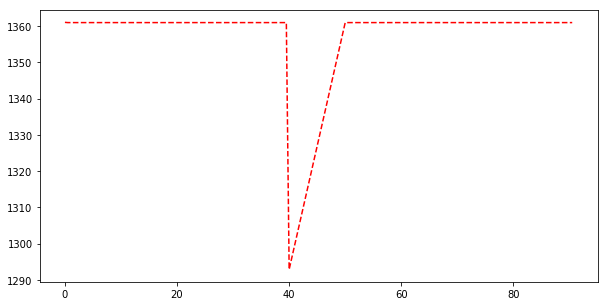

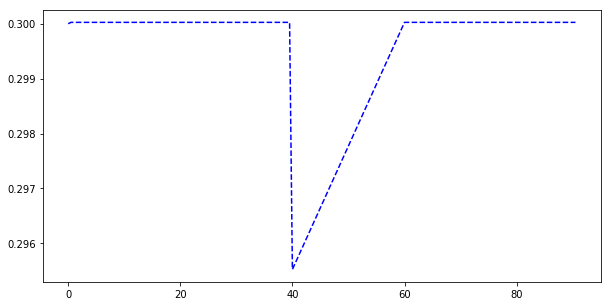

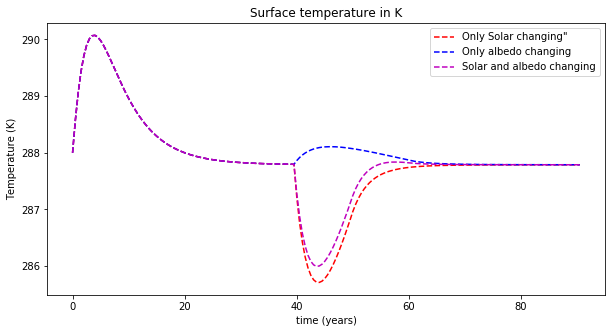

In [3]:
# Copied from previous code, adapted to use different constants and time dependent albedo and solar 

def integrate(T0,dt,end_time, T_atm_list, t_list, s_list, a_list, C, option):
    T_atm,t = T0, 0
    T_atm_list.clear(); T_atm_list.append(T0)
    t_list.clear(); t_list.append(t)
    s_list.clear(); s_list.append(S0)
    a_list.clear(); a_list.append(alpha)

    # use Euler forward method to integrate Temperature over time
    while (t<=end_time):
        t = t  + dt
        if option==1:
            T_atm = T_atm  + dt*(A/C*solar(t,t_end)*s_y(y)*(1-albedo(y)) - (1-eps/2) * B/C * T_atm**4)
        if option==2:
            T_atm = T_atm  + dt*(A/C*S0*s_y(y)*(1-alb(t,t_end,y)) - (1-eps/2) * B/C * T_atm**4)
        if option==3:
            T_atm = T_atm  + dt*(A/C*solar(t,t_end)*s_y(y)*(1-alb(t,t_end,y)) - (1-eps/2) * B/C * T_atm**4)
        t_list.append(t)
        T_atm_list.append(T_atm)
        s_gmean=np.mean(solar(t,t_end)*s_y(y))
        a_gmean=np.mean(alb(t,t_end,y))
        s_list.append(s_gmean)
        a_list.append(a_gmean)

#create a list to hold the results
T1_atm  = []
s1= []
a1= []
time   = []

integrate(T0=T0,   dt=dt, end_time=t_end, T_atm_list=T1_atm,  t_list=time, s_list=s1, a_list=a1, C=C_100m, option=1)
T11=np.array(T1_atm)
T1=np.mean(T11,1)
integrate(T0=T0,   dt=dt, end_time=t_end, T_atm_list=T1_atm,  t_list=time, s_list=s1, a_list=a1, C=C_100m, option=2)
T22=np.array(T1_atm)
T2=np.mean(T22,1)
integrate(T0=T0,   dt=dt, end_time=t_end, T_atm_list=T1_atm,  t_list=time, s_list=s1, a_list=a1, C=C_100m, option=3)
T33=np.array(T1_atm)
T3=np.mean(T33,1)


fig = plt.figure(figsize=(10,5))
time_axis   = np.array(time)/years
plt.plot(time_axis,s1,'r--')
fig = plt.figure(figsize=(10,5))
plt.plot(time_axis,a1,'b--')
albedo_part1=a1
fig = plt.figure(figsize=(10,5))
plt.plot(time_axis,T1,'r--',label='Only Solar changing"')
plt.xlabel("time (years)"); plt.ylabel("Temperature (K)")
plt.title("Surface temperature in K"); 
plt.plot(time_axis,T2,'b--',label='Only albedo changing')
plt.plot(time_axis,T3,'m--',label='Solar and albedo changing')
plt.legend()

print(T1[-1])

### 4. Adding a simple parameterization for albedo change in response to temperature change (10 points)

A. As the world cools, sea ice and snow cover would increase. But so far we do not have any tempertaure-dependent changes in the albedo that would reflect such an increase in high albedo snow and ice surfaces. You task is to come up with a simple parameterisation to simulate the change in albedo from increases in sea ice and snow cover in the 1D single layer grey atmosphere model when tempertaures cool, so we can test what additional affect sea ice and snow cover changes would have on the nuclear winter scenario we dealt with above. We will not deal with melting/decreasing snow and ice here, only increasing snow and ice. 
Please use the following in your albedo parameterisation
* Use the latitudinally varying albedo function as baseline that changes are applied to if needed
* Assume that the albedo of snow and ice is 0.55
* Assume that an annual mean tempertaure of -25 degree C or less leads to permanent snow and ice cover.
* Epsilon needs to be changed to eps=0.812 when using this new albedo parameterization.

These numbers may not seem correct, but we are dealing with the EBM without heat transport, so the simulated temperatures are not realistic either. So the tempertaure and epsilon values given above are chosen so that the global albedo overall does not change significantly for no perturbation and to compensate for the small unavoidable change in global albedo (epsilon change), so that the global mean tempertaure for no perturbation with this tempertaure dependent albedo is still around 288K (if rounded, otherwise around 287.7K). (8 points)

B. Plot the resulting global surface temperature from the albedo parameterisation combind with the Solar radiation change only and with the combined Solar and fire-albedo change from 3 (total of 2 new lines asked), on the same scale as used for the plot above. (1 point)

C. Describe how the additional tempertaure-dependent albedo parameterization affected the results. In particular, is this global tempertaure dependent albedo change big enough to compensate for the effect of the fire-driven albedo change that we used in 3?  (1 point)


In [4]:
# 4.A. Building on the code for 3, I'm now adding a function for temperature-dependent albedo 
eps=0.812
def alpha_t(t,t_end,y,T,option=1):
    if option==3:
        a = alb(t,t_end,y)
    else: 
        a = albedo(y) 
    for i in range(10000):
        if T[i] <=(273.15-25):
            a[i]=0.55
        else:
            a[i]=a[i]
    type(a)        
    return a

def integrate_2(T0, dt, end_time, T_atm_list, t_list, s_list, a_list, C, option):
    T_atm, t = T0, 0
    T_atm_list.clear(); T_atm_list.append(T0)
    t_list.clear(); t_list.append(t)
    s_list.clear(); t_list.append(solar(t,t_end)*s_y(y))
    a_list.clear(); t_list.append(alpha_t(t,t_end,y,T_atm))
    
    # use Euler forward method to integrate Temperature over time
    while (t<=end_time):
        t = t  + dt
        if option==1:
            T_atm = T_atm  + dt*(A/C*S0*s_y(y)*(1-alpha_t(t,t_end,y,T_atm,option)) - (1-eps/2) * B/C * T_atm**4)
        if option==2:
            T_atm = T_atm  + dt*(A/C*solar(t,t_end)*s_y(y)*(1-alpha_t(t,t_end,y,T_atm,option)) - (1-eps/2) * B/C * T_atm**4)
        if option==3:
            T_atm = T_atm  + dt*(A/C*solar(t,t_end)*s_y(y)*(1-alpha_t(t,t_end,y,T_atm,option)) - (1-eps/2) * B/C * T_atm**4)    
        t_list.append(t)
        T_atm_list.append(T_atm)
        s_list.append(solar(t,t_end))
        a_list.append(alpha_t(t,t_end,y,T_atm,option=3))

T2_atm  = []
a1      = []

integrate_2(T0=T0, dt=dt, end_time=t_end, T_atm_list=T2_atm,  t_list=time, s_list=s1, a_list=a1, C=C_100m, option=1)
T44=np.array(T2_atm)
T4=np.mean(T44,1)
integrate_2(T0=T0, dt=dt, end_time=t_end, T_atm_list=T2_atm,  t_list=time, s_list=s1, a_list=a1, C=C_100m, option=2)
T55=np.array(T2_atm)
T5=np.mean(T55,1)
integrate_2(T0=T0, dt=dt, end_time=t_end, T_atm_list=T2_atm,  t_list=time, s_list=s1, a_list=a1, C=C_100m, option=3)
T66=np.array(T2_atm)
T6=np.mean(T66,1)



287.78598713477305


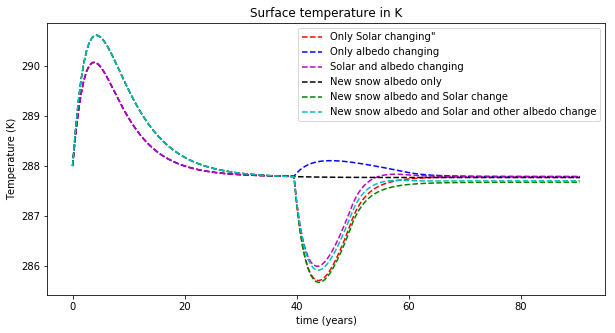

In [5]:
fig = plt.figure(figsize=(10,5))
plt.plot(time_axis,T1,'r--',label='Only Solar changing"')
plt.xlabel("time (years)"); plt.ylabel("Temperature (K)")
plt.title("Surface temperature in K"); 
plt.plot(time_axis,T2,'b--',label='Only albedo changing')
plt.plot(time_axis,T3,'m--',label='Solar and albedo changing')
plt.plot(time_axis,T4,'k--',label='New snow albedo only')
plt.plot(time_axis,T5,'g--',label='New snow albedo and Solar change')
plt.plot(time_axis,T6,'c--',label='New snow albedo and Solar and other albedo change')
plt.legend()

print(T4[-101])


0.30659974230846426
181


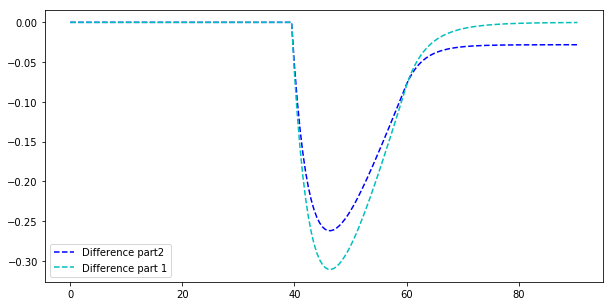

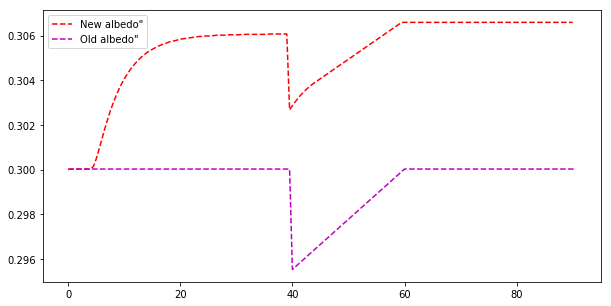

In [6]:
#Additional figures

fig = plt.figure(figsize=(10,5))
plt.plot(time_axis,T5-T6,'b--',label='Difference part2')
plt.plot(time_axis,T1-T3,'c--',label='Difference part 1')
plt.legend()


tt=np.linspace(0,90,181)        # y-variable, from -1 to 1 with 10,000 increments.
u=tt*0+1
aa=np.mean(a1,1)
print(aa[-1])
print(len(aa))
#print(np.mean(a1,1))
#albedo_new=np.array(a1)
#albedo_new_global_mean=np.mean(albedo_new,1)
#fig = plt.figure(figsize=(10,5))
fig = plt.figure(figsize=(10,5))
plt.plot(tt,aa,'r--',label='New albedo"')
plt.plot(time_axis,albedo_part1,'m--',label='Old albedo"')
plt.legend()




#### Answer:

4 C. The tempertaure dependent albedo paramaterisation changes the tempertaure response a little bit, making it a little bit colder than before, but not by much. It also, more noticably, increases the solar+fire albedo global tempertaures compared to 3, by making the overall global albedo change smaller, and hence leading to a smaller warming from the albedo change due to fires because at the poles, the cooling from the reduced solar radiation leads to expansion of sea ice and snow, increasing the albedo. The tempertaure dependent paramterisation as coded is not big enough to fully compensate for the warming from the fire-albedo change from 3.
